In [1]:
import pandas as pd
import numpy as np
rain_df = pd.read_csv('weatherAUS.csv')
rain_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [2]:
rain_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [3]:
rain_df.dropna(subset = ['RainTomorrow'], inplace =True)
target_col='RainTomorrow'
input_cols = list(rain_df.columns)[1:-1]
numeric_cols = rain_df[input_cols].select_dtypes(include=np.number).columns.tolist()
catagorical_cols = rain_df[input_cols].select_dtypes('object').columns.tolist()

In [4]:
from sklearn.impute import SimpleImputer
rain_df[numeric_cols] = SimpleImputer(strategy='mean').fit_transform(rain_df[numeric_cols])

In [5]:
rain_df[numeric_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [6]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
rain_df[numeric_cols] = MinMaxScaler().fit_transform(rain_df[numeric_cols])
rain_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,0.487887,0.529807,0.006334,0.037723,0.525852,0.263444,0.107708,0.214225,0.688438,0.514826,0.614112,0.610531,0.493021,0.500352,0.510285,0.519909
std,0.150682,0.134396,0.022704,0.021849,0.188616,0.101848,0.068085,0.100248,0.189321,0.205321,0.111508,0.106909,0.253120,0.233857,0.136544,0.131877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.027586,0.525852,0.193798,0.053846,0.149425,0.570000,0.370000,0.545455,0.542400,0.333333,0.444444,0.411392,0.424184
50%,0.483491,0.519849,0.000000,0.037723,0.525852,0.255814,0.100000,0.214225,0.700000,0.514826,0.614112,0.610531,0.493021,0.500352,0.506329,0.512476
75%,0.596698,0.623819,0.002156,0.037723,0.600000,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.676800,0.666667,0.666667,0.605485,0.608445
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
encoder = OneHotEncoder(sparse=False,handle_unknown = "ignore").fit(rain_df[catagorical_cols])
encoded_cols =list(encoder.get_feature_names(catagorical_cols))
# encoded_cols = OneHotEncoder(sparse=False,handle_unknown = "ignore").fit(rain_df[catagorical_cols]).get_feature_names(catagorical_cols).tolist()

c:\users\yatharth\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [9]:
rain_df[encoded_cols] = encoder.transform(rain_df[catagorical_cols])

C:\Users\Yatharth\AppData\Local\Temp\ipykernel_7388\3649716002.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rain_df[encoded_cols] = encoder.transform(rain_df[catagorical_cols])
C:\Users\Yatharth\AppData\Local\Temp\ipykernel_7388\3649716002.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rain_df[encoded_cols] = encoder.transform(rain_df[catagorical_cols])
C:\Users\Yatharth\AppData\Local\Temp\ipykernel_7388\3649716002.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

In [22]:
year = pd.to_datetime(rain_df.Date).dt.year
x_train = rain_df[numeric_cols + encoded_cols][year < 2015]
x_val = rain_df[numeric_cols + encoded_cols][year == 2015]
x_test = rain_df[numeric_cols + encoded_cols][year > 2015]
target = rain_df[target_col][year<2015]
val_target = rain_df[target_col][year == 2015]
test_target = rain_df[target_col][year > 2015]
x_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.613208,0.701323,0.002695,0.037723,0.525852,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.718336,0.000000,0.037723,0.525852,0.286822,0.184615,0.298851,0.22,0.13,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144549,0.556604,0.786389,0.000000,0.037723,0.525852,0.193798,0.146154,0.229885,0.16,0.08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144550,0.608491,0.805293,0.000000,0.037723,0.525852,0.255814,0.200000,0.103448,0.15,0.08,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144551,0.674528,0.818526,0.000000,0.037723,0.525852,0.286822,0.215385,0.195402,0.22,0.09,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)
model.fit(x_train, target)

DecisionTreeClassifier(random_state=42)

In [18]:
predictions = model.predict(x_train)

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(predictions, target)

0.9999797955307714

In [21]:
val_predict = model.predict(x_val)
accuracy_score(val_predict, val_target)

0.7921188555510418

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

model.tree_.max_depth

48

[Text(0.5, 0.9, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.7, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439, 11979]'),
 Text(0.125, 0.5, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538, 7714]'),
 Text(0.0625, 0.3, 'Pressure3pm <= 0.583\ngini = 0.363\nsamples = 12620\nvalue = [9618, 3002]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Humidity3pm <= 0.512\ngini = 0.153\nsamples = 56632\nvalue = [51920, 4712]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.3, 'WindGustSpeed <= 0.318\ngini = 0.293\nsamples = 4299\nvalue = [3531, 768]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'WindGustSpeed <= 0.333\ngini = 0.478\nsamples = 8867\nvalue = [5370, 3497]'),
 T

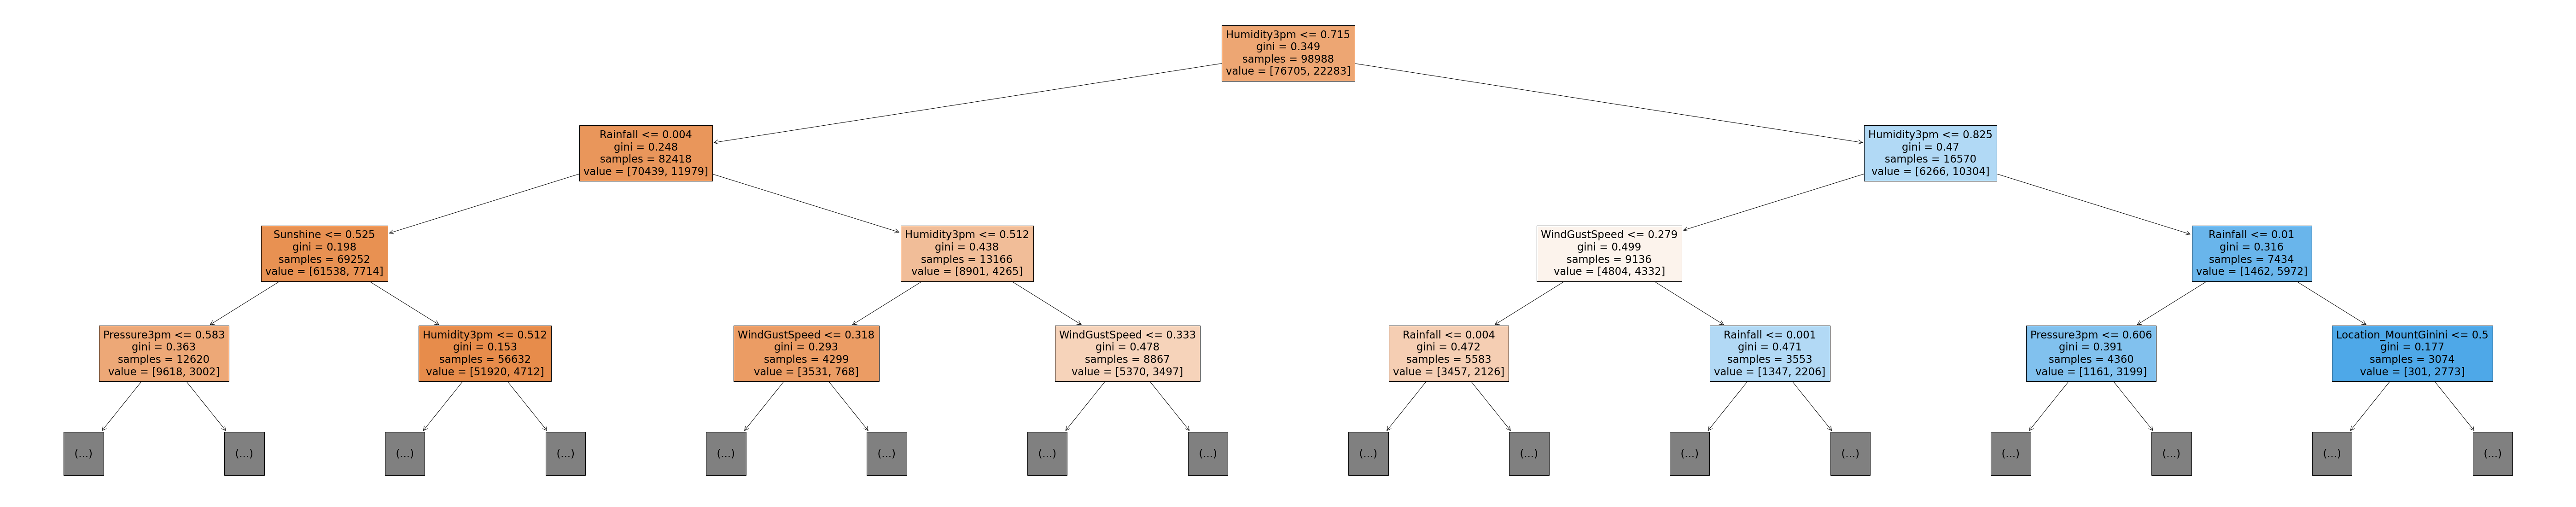

In [58]:
plt.figure(figsize=(100,20))
plot_tree(model, max_depth = 3, feature_names = x_train.columns, filled = True)

In [57]:
model1 = DecisionTreeClassifier(max_depth =8, random_state = 42)
model1.fit(x_train, target)
print("On training set: ", model1.score(x_train, target))
print("On validate set: ", model1.score(x_val, val_target))
print("On testing set:  ", model1.score(x_test, test_target) )

On training set:  0.8521942053582252
On validate set:  0.8419708664616099
On testing set:   0.8335258335258335


In [59]:
print(export_text(model1, feature_names=list(x_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- Location_Watsonia >  0.50
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- WindDir9am_NE >  0.50
|   |   |   |   |   |   |   |--- WindGustSpeed <= 0.25
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- WindGustSpeed >  0.25
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- Humidity3pm >  0.28
|   |   |   |   |   |   |--- Sunshine <= 0.05
|   |   |   |   |   |   |   |--- WindGustSpeed <= 0.25
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- WindGustSpeed >  0.25
|   |   |   |   |   |   |  